In [ ]:
!pip install av transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.9 MB/s eta 0:00:00


In [ ]:
import os
from tqdm import tqdm_notebook as tqdm
import torch
import torchvision
import numpy as np
from PIL import Image
import cv2
import glob
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
from PIL import Image
import av
import pandas as pd
from google.colab.patches import cv2_imshow
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer


In [ ]:
from google.colab.drive import mount

In [ ]:
mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/intern/practice/05mins_mp4.zip

Archive:  /content/drive/MyDrive/intern/practice/05mins_mp4.zip
   creating: 05mins_mp4/
  inflating: 05mins_mp4/John Wick Chapter 2  Train fight scene  Knife fight scene_1080p.mp4  
  inflating: 05mins_mp4/SPL 2 Knife man entry fight scene.mp4  
  inflating: 05mins_mp4/Highway Fight Scene  Captain America The Winter Soldier 2014 Movie CLIP HD_1080p.mp4  
  inflating: 05mins_mp4/Reacher Episode 2 BEST FIGHT SCENE  Knife FIGHT_1080p.mp4  
  inflating: 05mins_mp4/The Hunted (8_8) Movie CLIP - Knife Fight (2003) HD.mp4  
  inflating: 05mins_mp4/The Expendables  Jason Statham Fight Scene HD_720p.mp4  
  inflating: 05mins_mp4/03 THE UNIT Knife Fight Scene_360p.mp4  
  inflating: 05mins_mp4/Knife Fight at Action Factory  2 vs 1 Practice Fight Scene  Rustic B_1080p.mp4  
  inflating: 05mins_mp4/Accident Man _ Knife Fight Scene.mp4  
  inflating: 05mins_mp4/AGENT RED Fight Scene_1080pFHR.mp4  
  inflating: 05mins_mp4/Military Knife Fighting Techniques_480p.mp4  
  inflating: 05mins_mp4/Bullet 

In [ ]:
def display_video(video):
    fig = plt.figure(figsize=(3,3))
    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])
    anime = animation.ArtistAnimation(fig, mov, interval=45, repeat_delay=1000)
    plt.close()
    return anime
def extract_frames(video_path):
    video = av.open(str(video_path))
    for frame in video.decode(0):
        yield frame.to_image()

In [ ]:
#2mn good
frames=list(extract_frames("/content/05mins_mp4/Dune Shield Practice Knife Fight 1984 vs 2021_720p.mp4"))
print(len(frames),"time=")

3606 time= 2.637121544537078


In [ ]:
frames[0::len(frames)//5]

NameError: ignored

In [ ]:
video1=imageio.mimread("/content/05mins_mp4/AGENT RED Fight Scene_1080pFHR.mp4")
print(len(video1))
HTML(display_video(video1).to_html5_video())

RuntimeError: ignored

In [ ]:
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-d7tck9cq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-d7tck9cq
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.2 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369370 sha256=de30621ac53bb8fbe6022aa44fb0758a219ce0e99dddacda0f7e15b5fa4f225a
  Stored in directory: /tmp/pip-ephem-wheel-cache-no5_fona/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("RN50")
model=model.float()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

model_vit_gpt2 = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from torch.utils.data import DataLoader,Dataset

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self,video_path):
    self.frames=list(extract_frames(video_path))
    self.len_frames=len(self.frames)
    self.frames_uniformly_sampling=self.frames[0::len(self.frames)//10]
    self.frame_at=[0+i*self.len_frames//10 for i in range(0,11)]
    self.f_u_s_len=len(self.frames_uniformly_sampling)
  def get_df(self):
    return pd.DataFrame({"frame_at":self.frame_at,"img_arr":self.frames_uniformly_sampling})
  def __getitem__(self,idx):
    return preprocess(self.frames_uniformly_sampling[idx])
  def get_stack(self):
    self.to_stack=[]
    for i in ds:
      self.to_stack.append(i)
    return torch.tensor(np.stack(self.to_stack)).cuda()


In [ ]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
class clean_clean():
  def __init__(self,df,text_2_search,dl,model):
    self.text_descriptions=os.listdir("/content/drive/MyDrive/intern/practice/UCF-101_img/")
    self.text_descriptions.append(text_2_search)
    self.text_2_search=text_2_search
    self.img_stack=dl
    self.model=model
    self.pred_res=[]
    self.pred_res_top5=[]
    self.df=df
  def text_search(self):
    text_tokens = clip.tokenize(self.text_descriptions).cuda()
    with torch.no_grad():
      text_features=self.model.encode_text(text_tokens).float()
      text_features /= text_features.norm(dim=-1, keepdim=True)
      image_features= self.model.encode_image(self.img_stack).float()
      text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
      top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
      for i in top_labels:
          if self.text_descriptions[i[0]]==self.text_2_search or self.text_descriptions[i[1]]==self.text_2_search:
            self.pred_res.append(1)
          else:
            self.pred_res.append(0)
          self.pred_res_top5.append(i)
      self.df["res"]=self.pred_res
      self.df["top5_res"]=self.pred_res_top5
  def show(self):
    self.all_captions=[]
    for row,col in self.df.iterrows():
      try:
        if col["res"]==1:
          print(col["frame_at"])
          img_t_s=np.array(col["img_arr"])
          print([self.text_descriptions[i] for i in col["top5_res"]])
          self.pixel_values=feature_extractor(images=img_t_s, return_tensors="pt").pixel_values
          self.output_ids = model_vit_gpt2.generate(self.pixel_values, **gen_kwargs)
          self.preds = tokenizer.batch_decode(self.output_ids, skip_special_tokens=True)
          self.all_captions.append(self.preds[0])
          print(self.preds)
          img_t_s=cv2.cvtColor(img_t_s,cv2.COLOR_BGR2RGB)
          print(cv2_imshow(img_t_s))
      except:
        print("err")
      if col["res"]==0:
        self.all_captions.append("-")
        #self.preds =[pred.strip() for pred in self.preds]
    self.df["caption"]=self.all_captions

In [ ]:
#https://www.youtube.com/watch?v=6XFYV2h5gAo dune 
ds=CustomDataset("/content/05mins_mp4/Dune Shield Practice Knife Fight 1984 vs 2021_720p.mp4")
df=ds.get_df()
dl=ds.get_stack()

##knife

1442
['PlayingPiano', 'knife', 'ParallelBars', 'PlayingCello', 'YoYo']
['a woman taking a picture of herself in a mirror ']


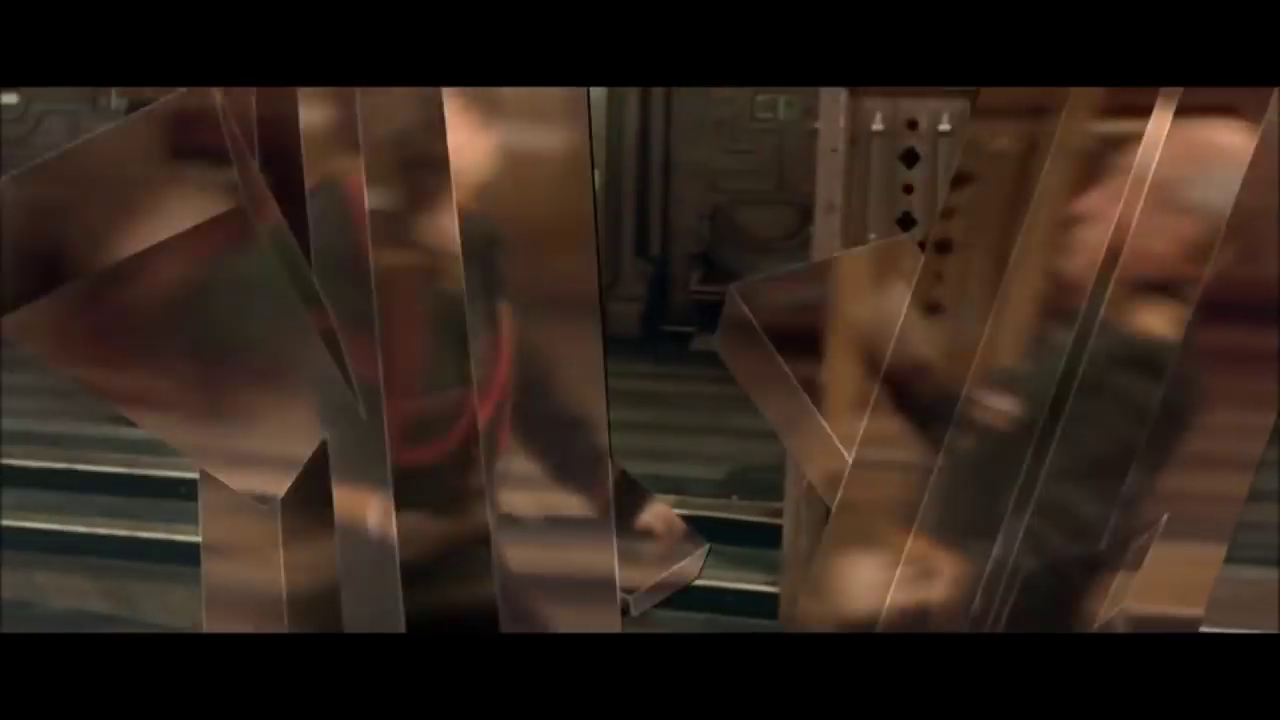

None
2884
['knife', 'Nunchucks', 'PlayingFlute', 'Skijet', 'Archery']
['a pair of scissors cutting through a green plant ']


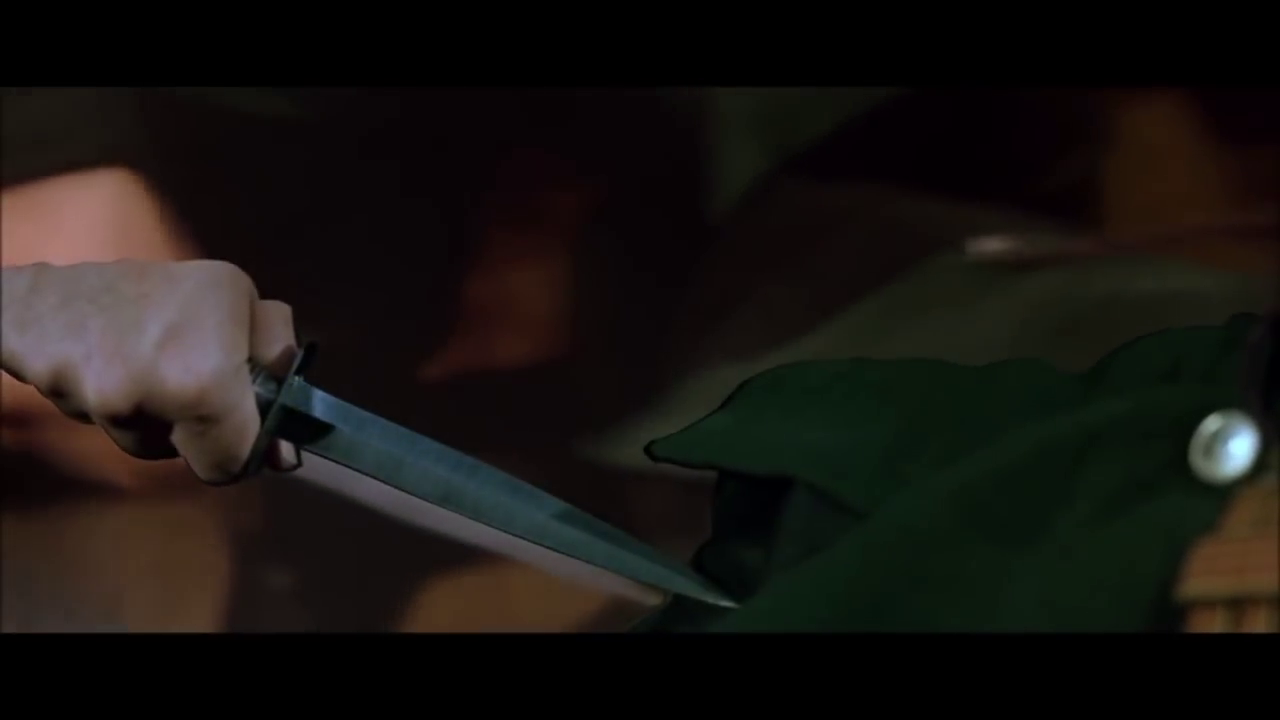

None


In [ ]:
all_in_one=clean_clean(df,"knife",dl,model)
all_in_one.text_search()
all_in_one.show()

In [ ]:
all_in_one.df

,frame_at,img_arr,res,top5_res,caption
0,0,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(11), tensor(93), tensor(19), tensor(9)...",-
1,360,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(68), tensor(93), tensor(11), tensor(9)...",-
2,721,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(4), tensor(44), tensor(24), tensor(16)...",-
3,1081,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(49), tensor(9), tensor(6),...",-
4,1442,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(16), tensor(101), tensor(49), tensor(5...",a woman taking a picture of herself in a mirror
5,1803,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(4), tensor(49), tensor(24)...",-
6,2163,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(12), tensor(18), tensor(22...",-
7,2524,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(63), tensor(49), tensor(44), tensor(12...",-
8,2884,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(101), tensor(68), tensor(97), tensor(3...",a pair of scissors cutting through a green plant
9,3245,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(10), tensor(63), tensor(70), tensor(42...",-


##general

0
['general', 'BandMarching', 'MilitaryParade', 'PommelHorse', 'JumpingJack']
['a man in a military uniform standing in front of a building ']


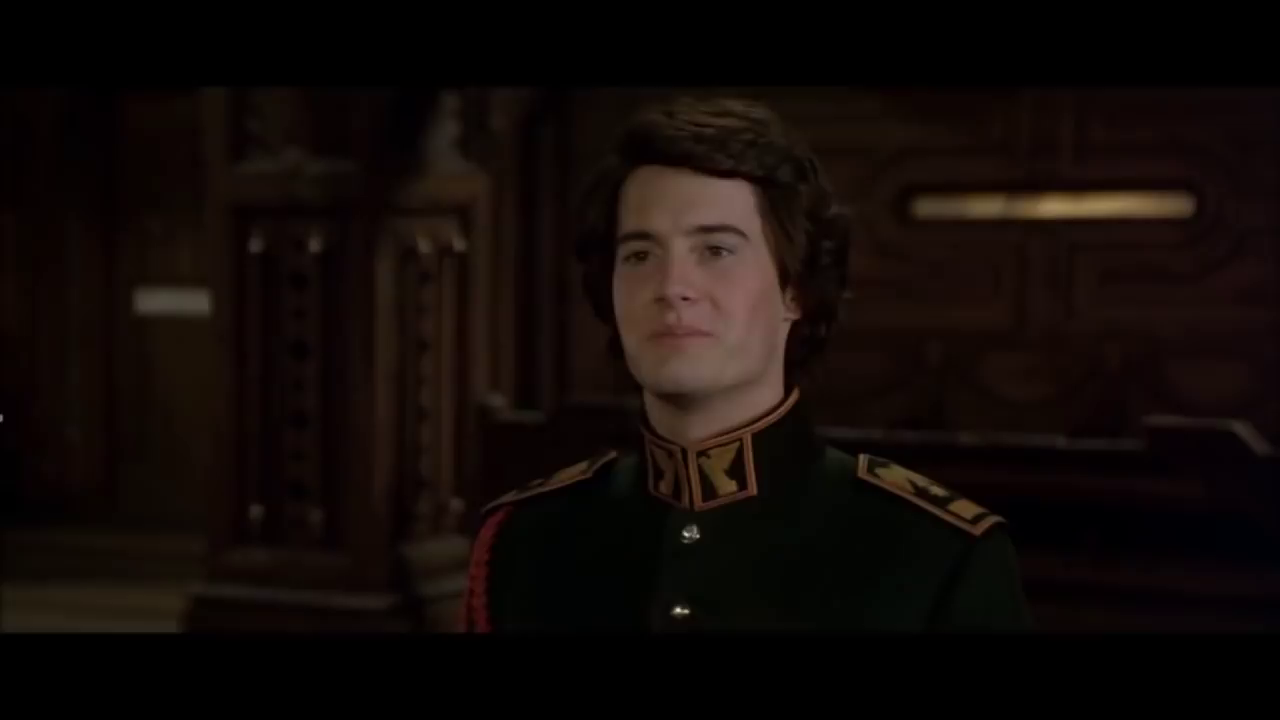

None
360
['general', 'Nunchucks', 'MilitaryParade', 'BandMarching', 'JumpingJack']
['a man in a uniform standing in front of a fire hydrant ']


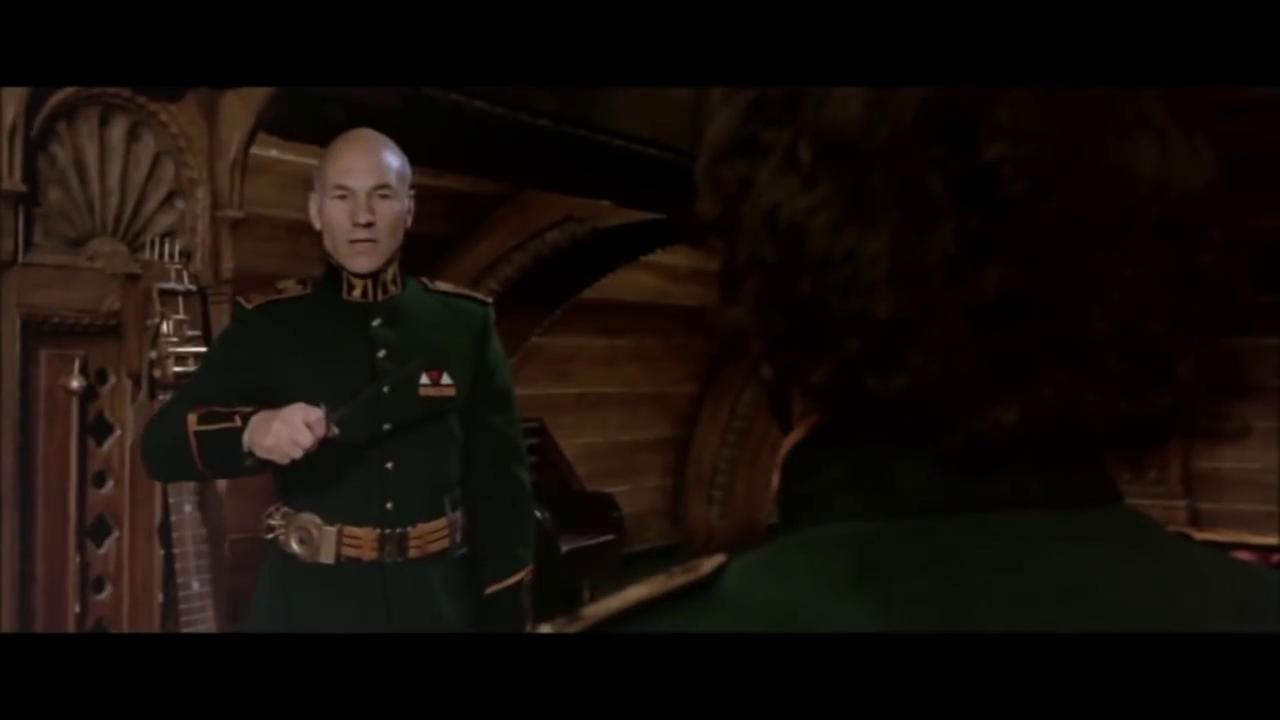

None
1081
['general', 'YoYo', 'ParallelBars', 'JumpingJack', 'HulaHoop']
['a man in a black shirt holding a cell phone ']


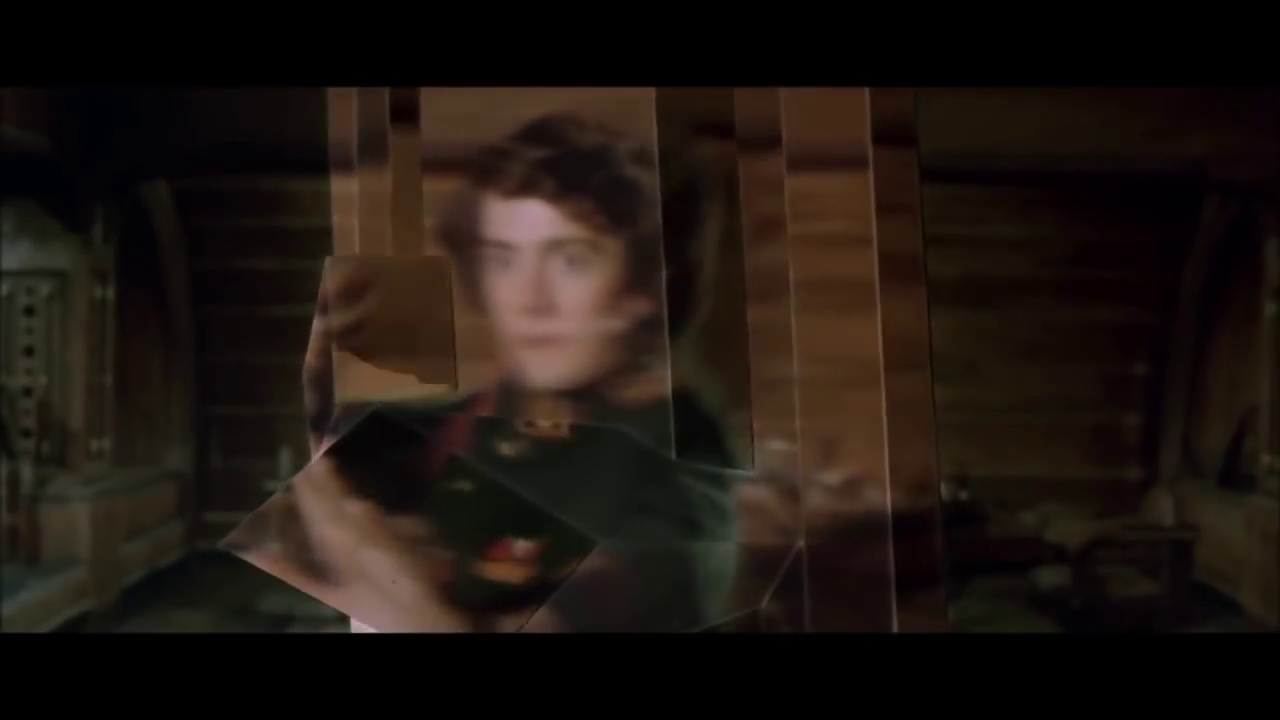

None
1803
['YoYo', 'general', 'Fencing', 'ParallelBars', 'CricketShot']
['a woman standing in front of a lamp in a dark room ']


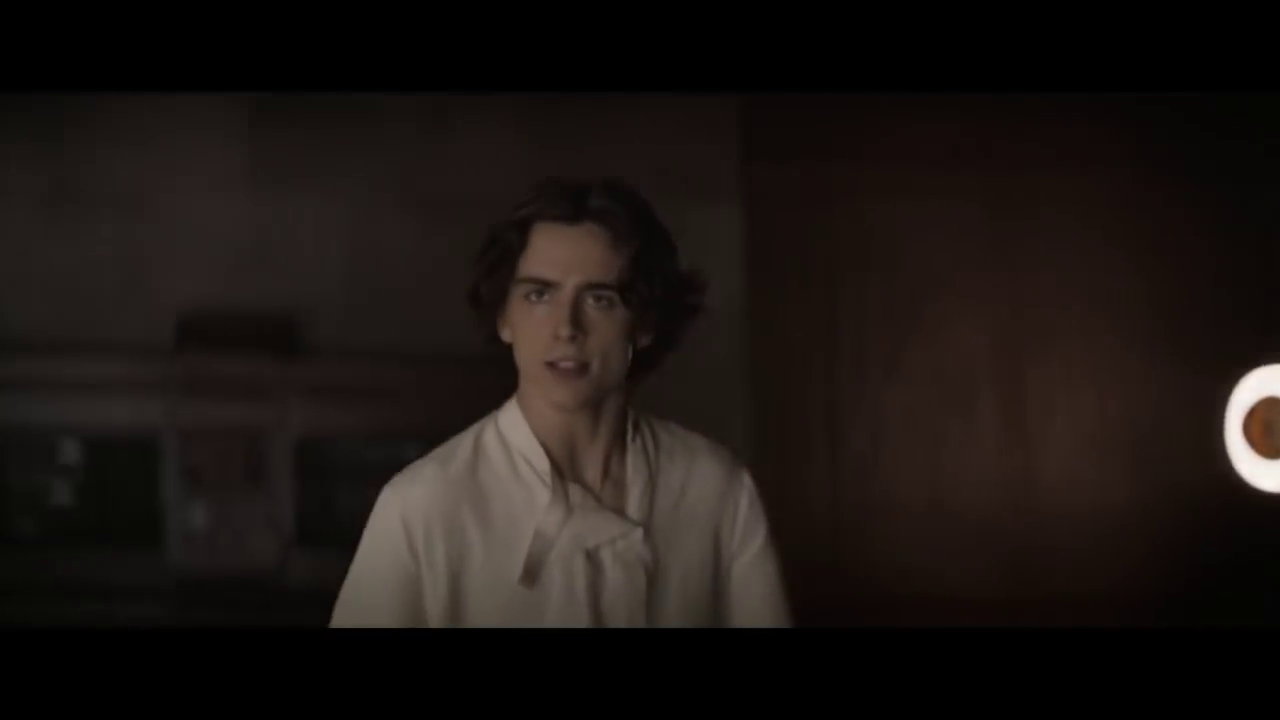

None
2884
['Nunchucks', 'general', 'PlayingFlute', 'Skijet', 'Archery']
['a pair of scissors cutting through a green plant ']


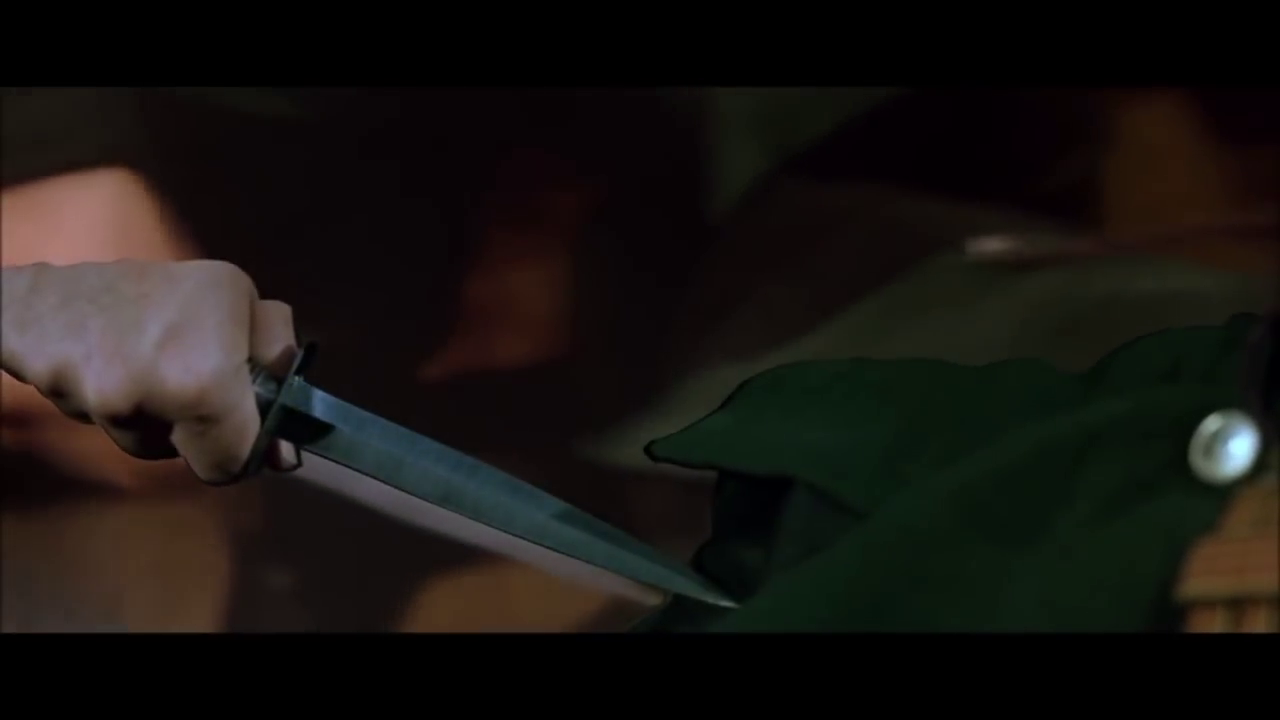

None


In [ ]:
all_in_one=clean_clean(df,"general",dl,model)
all_in_one.text_search()
all_in_one.show()

In [ ]:
all_in_one.df

,frame_at,img_arr,res,top5_res,caption
0,0,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(101), tensor(11), tensor(93), tensor(1...",a man in a military uniform standing in front ...
1,360,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(101), tensor(68), tensor(93), tensor(1...",a man in a uniform standing in front of a fire...
2,721,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(4), tensor(44), tensor(24), tensor(16)...",-
3,1081,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(101), tensor(44), tensor(49), tensor(9...",a man in a black shirt holding a cell phone
4,1442,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(16), tensor(49), tensor(50), tensor(44...",-
5,1803,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(44), tensor(101), tensor(4), tensor(49...",a woman standing in front of a lamp in a dark ...
6,2163,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(12), tensor(101), tensor(1...",-
7,2524,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(63), tensor(49), tensor(44), tensor(12...",-
8,2884,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(68), tensor(101), tensor(97), tensor(3...",a pair of scissors cutting through a green plant
9,3245,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(10), tensor(63), tensor(70), tensor(42...",-


##sad

1803
['YoYo', 'sad', 'Fencing', 'ParallelBars', 'CricketShot']
['a woman standing in front of a lamp in a dark room ']


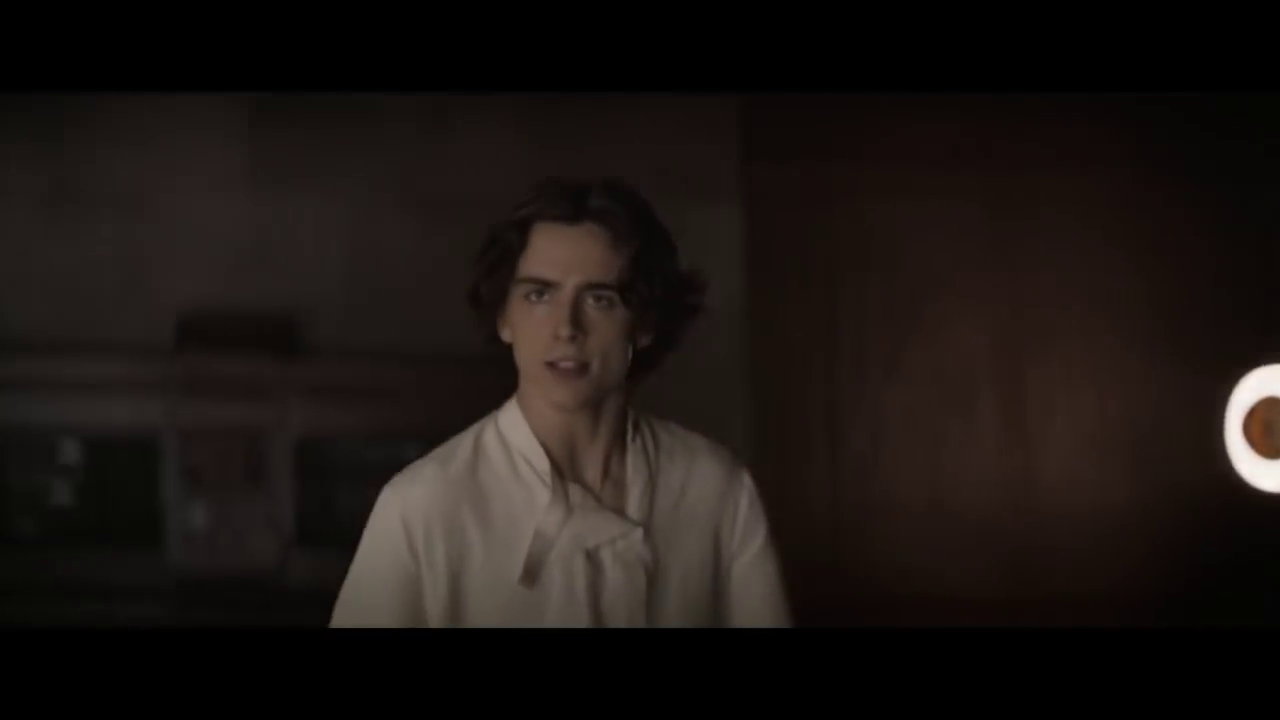

None


In [ ]:
all_in_one=clean_clean(df,"sad",dl,model)
all_in_one.text_search()
all_in_one.show()

In [ ]:
all_in_one.df

,frame_at,img_arr,res,top5_res,caption
0,0,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(11), tensor(93), tensor(101), tensor(1...",-
1,360,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(68), tensor(93), tensor(11), tensor(9)...",-
2,721,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(4), tensor(44), tensor(24), tensor(16)...",-
3,1081,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(49), tensor(101), tensor(9...",-
4,1442,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(16), tensor(49), tensor(50), tensor(44...",-
5,1803,<PIL.Image.Image image mode=RGB size=1280x720 ...,1,"[tensor(44), tensor(101), tensor(4), tensor(49...",a woman standing in front of a lamp in a dark ...
6,2163,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(44), tensor(12), tensor(18), tensor(22...",-
7,2524,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(63), tensor(49), tensor(44), tensor(12...",-
8,2884,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(68), tensor(97), tensor(33), tensor(96...",-
9,3245,<PIL.Image.Image image mode=RGB size=1280x720 ...,0,"[tensor(10), tensor(63), tensor(70), tensor(42...",-
